In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cab_data = pd.read_csv("DataSets-main\Cab_Data.csv", encoding = "utf-8")
city = pd.read_csv("DataSets-main\City.csv", encoding = "utf-8")
customer_id = pd.read_csv("DataSets-main\Customer_ID.csv", encoding = "utf-8")
transaction_id = pd.read_csv("DataSets-main\Transaction_ID.csv", encoding = "utf-8")

cab_data['margin'] = cab_data['Price Charged'] - cab_data['Cost of Trip'] 


# Data Cleanning

#Convert date (from serial to Date)
def xldate_to_datetime(xldate):
	temp = datetime.datetime(1900, 1, 1)
	delta = datetime.timedelta(days=xldate)
	return temp+delta

cab_data['Date of Travel'] = cab_data['Date of Travel'].map(xldate_to_datetime)

#Convert to int
city['Users'] = city['Users'].str.replace(',','')
city['Population'] = city['Population'].str.replace(',','')

city['Users'] = city['Users'].astype(int)
city['Population'] = city['Population'].astype(int)


cab_data.to_csv (r'cab_data.csv', index = False, header=True)
city.to_csv (r'city.csv', index = False, header=True)
customer_id.to_csv (r'customer_id.csv', index = False, header=True)
transaction_id.to_csv (r'transaction_id.csv', index = False, header=True)
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


Descriptive Analysis

Cab_Data:

Transaction ID (Categorical)

Date of Travel (Categorical)

Company (Categorical)

City (Categorical)

KM Traveled (Numerical)

Price Charged (Numerical)

Cost of Trip (Numerical)

City:

City (Categorical)

Population (Numerical)

Users (Numerical)

Customer_id:

Customer ID (Categorical)

Gender (Categorical)

Age (Numerical)

Income (USD/Month) (Numerical)

transaction_id:

Transaction ID (Categorical)

Customer ID (Categorical)

Payment_Mode (Numerical)


Hypothesis:

Does margin increase with a major population?

Are number of cab users increasing with time advance?

Is the most populated region the most profitable?

Is a user with major income related with more profit for the company?

Is the company with more users the most profitable?



Does margin increase with a major population?

We use qualitative analysis because of the nature of the fields (categorical and numerical), particularly descriptive statistics and note that it's not neccesary that margin increases with population, but yes with number of users.


In [6]:
# Does margin increase with a major population?

# Join table Cab_data ans City


join_cd_city = cab_data.set_index('City').join(city.set_index('City'))

#sum margin by region

join_cd_city = join_cd_city.groupby(['City', 'Population'])[['margin']].sum()

join_cd_city = join_cd_city.sort_values(by=['Population'], ascending=False)

join_cd_city.to_csv (r'join_cd_city.csv', index = True, header=True)

join_cd_city

,,margin
City,Population,
NEW YORK NY,8405837,2.796256e+07
CHICAGO IL,1955130,3.387313e+06
LOS ANGELES CA,1595037,4.411709e+06
MIAMI FL,1339155,7.583012e+05
SILICON VALLEY,1177609,1.316705e+06
ORANGE COUNTY,1030185,4.570019e+05
SAN DIEGO CA,959307,1.587163e+06
PHOENIX AZ,943999,1.929409e+05
DALLAS TX,942908,1.128733e+06


Are number of cab users increasing with time advance?

Using qualitative analysis, and a bar graph we can see that the number of user per year increase between 2017 and 2018 buy decrease in 2018, with regard to 2019 the data are insufficient.


<AxesSubplot:xlabel='Date of Travel'>

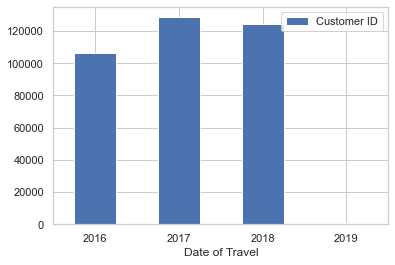

In [147]:
join_cd_trasaction = cab_data.set_index('Transaction ID').join(transaction_id.set_index('Transaction ID'))

join_cd_trasaction['Date of Travel'] = join_cd_trasaction['Date of Travel'].dt.year


join_cd_trasaction = join_cd_trasaction.groupby(['Date of Travel'])[['Customer ID']].count()

join_cd_trasaction.plot.bar(rot=0)

Is the most populated region the most profitable?

It correspond to New York and yes it's the most profitable region for both companies

In [151]:
# getting the most populated city and max margin

city_major = max(city['Population'])

max_profit = max(join_cd_city['margin'])

print(city_major)
print(max_profit)

join_cd_city

8405837
27962555.159199964


,,margin
City,Population,
NEW YORK NY,8405837,2.796256e+07
CHICAGO IL,1955130,3.387313e+06
LOS ANGELES CA,1595037,4.411709e+06
MIAMI FL,1339155,7.583012e+05
SILICON VALLEY,1177609,1.316705e+06
ORANGE COUNTY,1030185,4.570019e+05
SAN DIEGO CA,959307,1.587163e+06
PHOENIX AZ,943999,1.929409e+05
DALLAS TX,942908,1.128733e+06


Is a user with major income related with more profit for the company?

The answer was no, the income of the user doesn't related with margin. (Analysis similar to recent hypothesis)

<AxesSubplot:xlabel='Customer ID,Income (USD/Month)'>

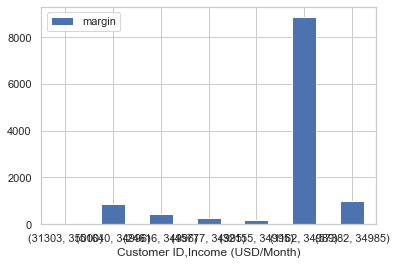

In [230]:
# Join with customer data

join_cd_trasaction2 = cab_data.set_index('Transaction ID').join(transaction_id.set_index('Transaction ID'))
join_cd_trasaction_customer = join_cd_trasaction2.set_index('Customer ID').join(customer_id.set_index('Customer ID'))
join_cd_trasaction_customer.dropna()
join_cd_trasaction_customer_hyp4 = join_cd_trasaction_customer.groupby(['Customer ID', 'Income (USD/Month)'])[['margin']].sum()
join_cd_trasaction_customer_hyp4 = join_cd_trasaction_customer_hyp4.sort_values(by=['Income (USD/Month)'], ascending=False)

# Select the 7 users with greater income
join_cd_trasaction_customer_hyp4 = join_cd_trasaction_customer_hyp4.head(7)

join_cd_trasaction_customer_hyp4.plot.bar(rot=0)

Is the company with more users the most profitable?

Yes, The company most profitable is Yellow Cab and has the major number of users

the number of users of Pink Cab is 32330
the number of users of Yellow Cab is 39896


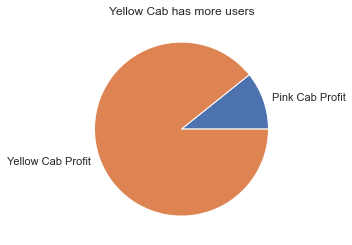

In [244]:
join_cd_trasaction_customer_pc = join_cd_trasaction_customer[join_cd_trasaction_customer['Company'] == 'Pink Cab']
join_cd_trasaction_customer_yc = join_cd_trasaction_customer[join_cd_trasaction_customer['Company'] == 'Yellow Cab']

join_cd_trasaction_customer_pc = join_cd_trasaction_customer_pc.groupby(['Customer ID'])[['margin']].sum()
join_cd_trasaction_customer_yc = join_cd_trasaction_customer_yc.groupby(['Customer ID'])[['margin']].sum()

print('the number of users of Pink Cab is ' + str(len(join_cd_trasaction_customer_pc)))
print('the number of users of Yellow Cab is ' + str(len(join_cd_trasaction_customer_yc)))

join_cd_trasaction_customer_hyp4 = join_cd_trasaction_customer.groupby(['Customer ID'])[['margin']].sum()

profit_pc = join_cd_trasaction_customer_pc['margin'].sum()
profit_yc = join_cd_trasaction_customer_yc['margin'].sum()

p = np.array([profit_pc, profit_yc])

plt.pie(p, labels = ['Pink Cab Profit', 'Yellow Cab Profit'])
plt.title('Yellow Cab has more users')
plt.show() 

In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,margin
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [4]:
cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'margin'],
      dtype='object')

In [5]:
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
margin                   float64
dtype: object

In [7]:
cab_data.set_index('Date of Travel',inplace=True)

In [9]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,margin
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000


Univariate Analysis

C:\Users\crbal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


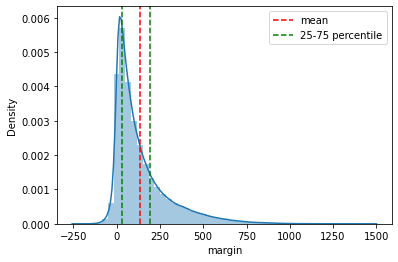

In [11]:
sns.distplot(cab_data['margin'])
plt.axvline(x=np.mean(cab_data['margin']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(cab_data['margin'],25),c='green', ls='--', label='25-75 percentile')
plt.axvline(x=np.percentile(cab_data['margin'],75),c='green', ls='--')
plt.legend()

C:\Users\crbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

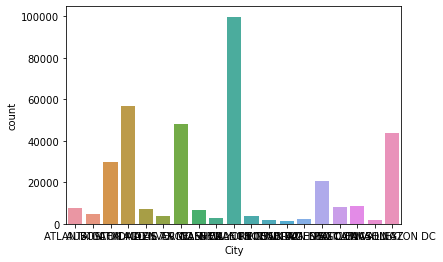

In [17]:
sns.countplot(cab_data['City'])

C:\Users\crbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

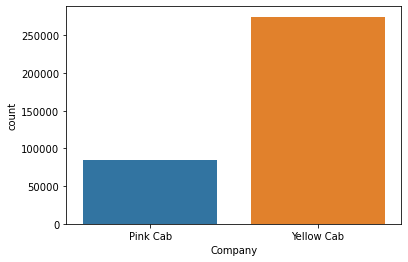

In [18]:
sns.countplot(cab_data['Company'])

array([[<AxesSubplot:title={'center':'Transaction ID'}>,
        <AxesSubplot:title={'center':'KM Travelled'}>],
       [<AxesSubplot:title={'center':'Price Charged'}>,
        <AxesSubplot:title={'center':'Cost of Trip'}>],
       [<AxesSubplot:title={'center':'margin'}>, <AxesSubplot:>]],
      dtype=object)

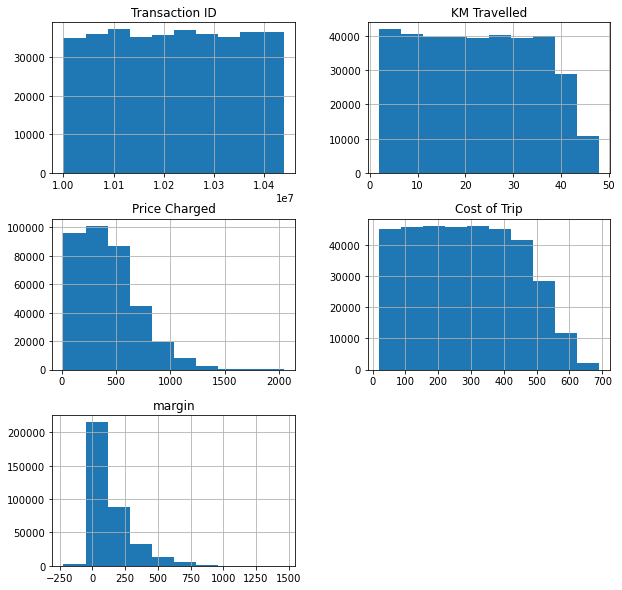

In [19]:
cab_data.hist(figsize=(10,10))

Bivariate Analysis

C:\Users\crbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost of Trip', ylabel='Price Charged'>

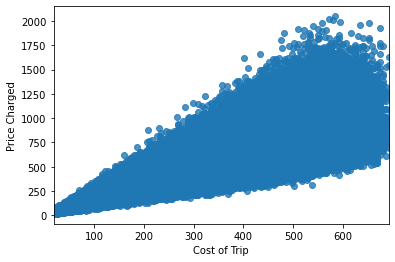

In [27]:
sns.regplot(cab_data['Cost of Trip'],cab_data['Price Charged'])

<AxesSubplot:xlabel='Company', ylabel='margin'>

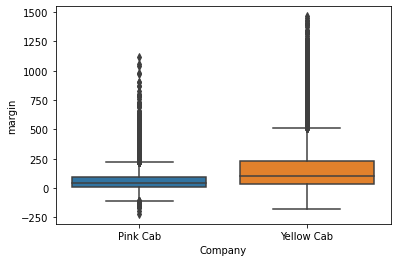

In [29]:
sns.boxplot(x=cab_data['Company'], y=cab_data['margin'])

In [32]:
sns.boxplot(x=cab_data['Price Charged'], y=cab_data['margin'])

KeyboardInterrupt: 

In [35]:
cab_data.groupby(cab_data.index).mean()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,margin
Date of Travel,,,,,
2016-01-04,1.000070e+07,22.618564,565.281602,288.458054,276.823548
2016-01-05,1.000063e+07,23.426011,569.362809,293.688029,275.674780
2016-01-06,1.000064e+07,21.138800,442.109600,278.957912,163.151688
2016-01-07,1.000082e+07,26.443191,600.062128,342.966923,257.095204
2016-01-08,1.000067e+07,22.343394,473.913578,281.249106,192.664472
...,...,...,...,...,...
2018-12-29,1.043488e+07,22.320975,385.856950,284.106062,101.750888
2018-12-30,1.043479e+07,22.042693,418.656287,277.623884,141.032403
2018-12-31,1.043487e+07,22.828145,433.549612,290.259824,143.289788


<AxesSubplot:xlabel='Date of Travel', ylabel='margin'>

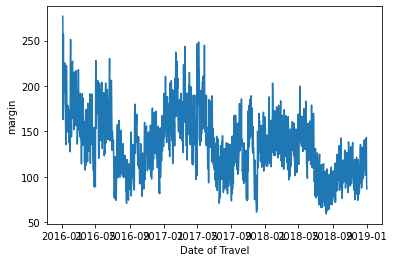

In [36]:
sns.lineplot(x=cab_data.groupby(cab_data.index).mean().index, y=cab_data.groupby(cab_data.index).mean()['margin'])

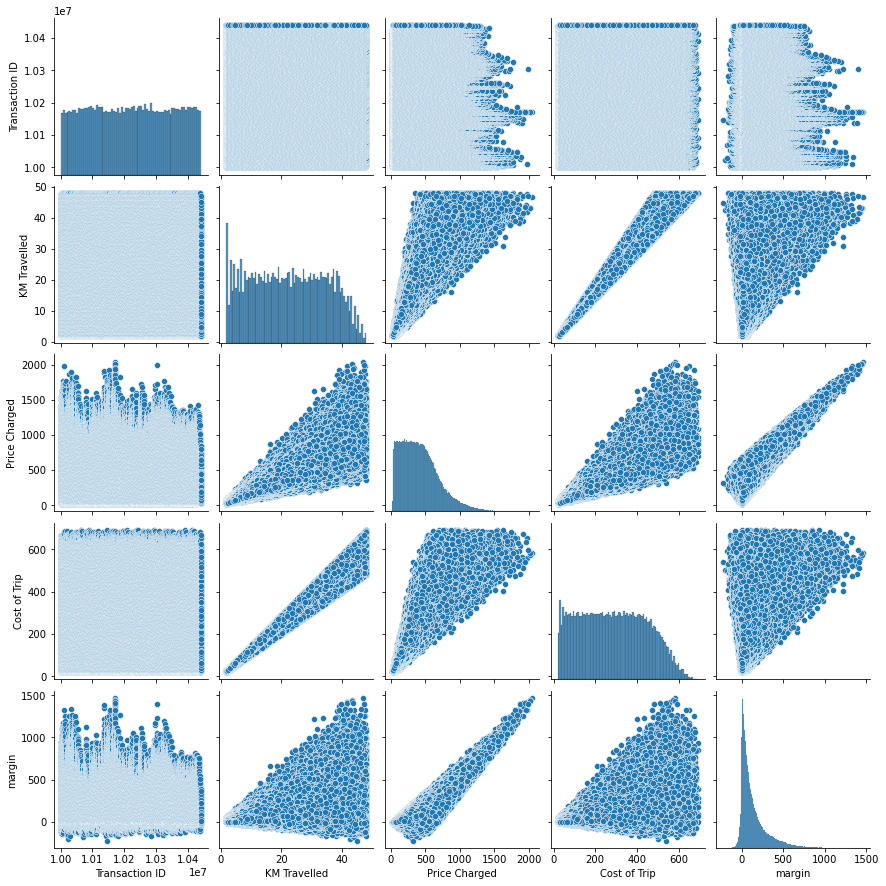

In [37]:
sns.pairplot(cab_data)

In [38]:
cab_data.duplicated().sum()

0

In [40]:
cab_data.isna().sum()/len(cab_data)

Transaction ID    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
margin            0
dtype: int64

<AxesSubplot:ylabel='Date of Travel'>

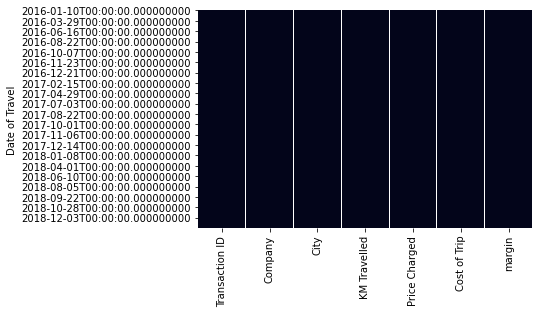

In [41]:
sns.heatmap(cab_data.isnull(),cbar=False)

In [4]:
import calmap
from pandas_profiling import ProfileReport

dataset = pd.read_csv('DataSets-main\Cab_Data.csv')
prof = ProfileReport(cab_data)
prof

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [5]:
round(np.corrcoef(cab_data['margin'],cab_data['Price Charged'])[1][0],2)

0.86

In [6]:
np.round(cab_data.corr(),2)

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,margin
Transaction ID,1.00,-0.00,-0.05,-0.00,-0.09
KM Travelled,-0.00,1.00,0.84,0.98,0.46
Price Charged,-0.05,0.84,1.00,0.86,0.86
Cost of Trip,-0.00,0.98,0.86,1.00,0.49
margin,-0.09,0.46,0.86,0.49,1.00


In [9]:
sns.heatmap(np.round(cab_data.corr(),2), annot=True)

<AxesSubplot:>